In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load the dataset iris

In [0]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# 2. Split the dataset in train and test

In [0]:
# use train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

# 3. Train a KNN classifier with 5 neighbors and get its accuracy

In [33]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

# 4. Evaluate the accuracy of the model using a KFold cross validation with K=10

In [34]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [35]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9666666666666668


# 5. Find the number of neighbors in the range (1,31) that generates the best accuracy in a KFold cross validation with K=10

In [36]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [37]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9800000000000001


# 6. [Optional] Plot the accuracies obtained from the previuos point and find the optimal number of neighbors

Text(0, 0.5, 'Cross-validated accuracy')

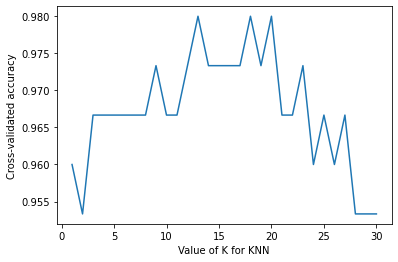

In [38]:
# plot how accuracy changes as we vary k

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

# 7. Compute the accuracy of the model in cross validation using the number of neighbors discovered previuosly

In [39]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


# 8. Compare this model with a new LogisticRegression model. Which one generates the best accuracy?

In [40]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9733333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# 9. Load the dataset Advertising.csv (consider the first column as the index)

In [41]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))

In [43]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [0]:
# read in the advertising dataset
# data = pd.read_csv('https://drive.google.com/uc?id=18r55LcC_feWQIpM76IJk7b1Qige0N69L', index_col=0)

In [0]:
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
# since we're selecting only one column, we can select the attribute using .attribute
y = data.Sales

In [46]:
print(metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


# 10. Create a linear regression model that predicts the sale amount ('Sales' attribute) with respect the other features

In [0]:
# 10-fold cross-validation with all three features
# instantiate model
lm = LinearRegression()

# 11. Evaluate the model in cross validation (with K=10) with the measure RMSE (note that the cross validation model can output the negative version of MSE and you have to compute the RMSE measure from it)

In [48]:
# store scores in scores object
# we can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]
[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [49]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [50]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051792


# 12. How the results change if we remove the Newspaper feature? Is this feature relevant for the final prediction?

In [51]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766
